In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [6]:
df = pd.read_csv('data/일별평균대기오염도_2022(에어코리아).csv', encoding='cp949')
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20220101,강남구,0.029,0.014,0.5,0.003,25.0,12.0
1,20220101,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0
2,20220101,행주,0.034,0.012,0.7,0.004,27.0,16.0
3,20220101,항동,0.030,0.011,0.5,0.003,27.0,14.0
4,20220101,한강대로,0.037,0.011,0.6,0.003,34.0,14.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB


In [15]:
# 측정일시 컬럼 -> 날짜형으로 변환 (할당:한 번 실행)
df['측정일시'] = df['측정일시'].astype(str)
df['측정일시'] = df['측정일시'].str[:4] + '-' + df['측정일시'].str[4:6] + '-' + df['측정일시'].str[6:]

In [19]:
df.head()  # df.info() : object

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,2022-01-01,강남구,0.029,0.014,0.5,0.003,25.0,12.0
1,2022-01-01,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0
2,2022-01-01,행주,0.034,0.012,0.7,0.004,27.0,16.0
3,2022-01-01,항동,0.030,0.011,0.5,0.003,27.0,14.0
4,2022-01-01,한강대로,0.037,0.011,0.6,0.003,34.0,14.0


In [21]:
df['측정일시'] = pd.to_datetime(df['측정일시'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   측정일시          18250 non-null  datetime64[ns]
 1   측정소명          18250 non-null  object        
 2   이산화질소농도(ppm)  18172 non-null  float64       
 3   오존농도(ppm)     18176 non-null  float64       
 4   일산화탄소농도(ppm)  18174 non-null  float64       
 5   아황산가스농도(ppm)  18176 non-null  float64       
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64       
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.1+ MB


In [24]:
df['측정소명'].unique()

array(['강남구', '홍릉로', '행주', '항동', '한강대로', '청계천로', '천호대로', '중랑구', '중구',
       '종로구', '종로', '정릉로', '자연사박물관', '은평구', '용산구', '올림픽공원', '영등포로',
       '영등포구', '양천구', '신촌로', '시흥대로', '송파구', '세곡', '성북구', '성동구', '화랑로',
       '서초구', '서울숲', '서대문구', '북한산', '마포아트센터', '마포구', '동작대로', '동작구',
       '동대문구', '도산대로', '도봉구', '노원구', '남산', '금천구', '구로구', '광진구', '관악산',
       '관악구', '공항대로', '강서구', '강북구', '강변북로', '강동구', '강남대로'], dtype=object)

In [32]:
df_flt = df.loc[df['측정소명'] == '공항대로']
df_flt.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
44,2022-01-01,공항대로,0.035,0.010,0.6,0.002,31.0,15.0
93,2022-01-02,공항대로,0.027,0.017,0.5,0.003,37.0,22.0
143,2022-01-03,공항대로,0.041,0.007,0.6,0.003,31.0,18.0
196,2022-01-04,공항대로,0.032,0.010,0.5,0.003,48.0,21.0
244,2022-01-05,공항대로,0.045,0.004,0.8,0.003,56.0,34.0


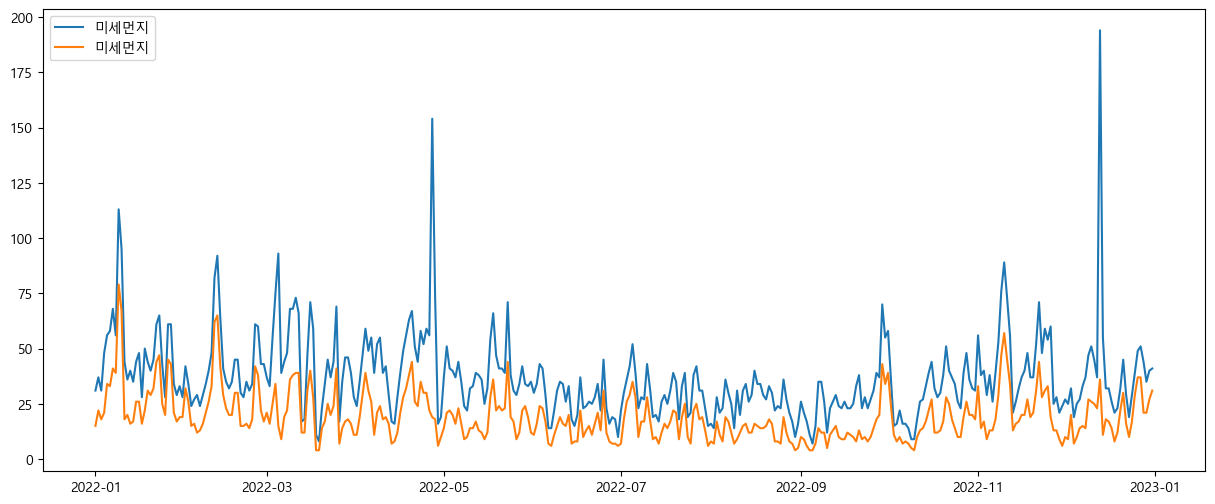

In [33]:
plt.figure(figsize=(15, 6))
plt.plot(df_flt['측정일시'], df_flt['미세먼지농도(㎍/㎥)'], label='미세먼지')
plt.plot(df_flt['측정일시'], df_flt['초미세먼지농도(㎍/㎥)'], label='미세먼지')
plt.legend(loc='upper left')
plt.show()

In [38]:
df_flt2 = df_flt[['측정일시', '미세먼지농도(㎍/㎥)']]
df_flt2.columns = ['측정일시', '미세먼지농도']
df_flt3 = df_flt2.set_index('측정일시')
df_flt3.head()

,미세먼지농도
측정일시,
2022-01-01,31.0
2022-01-02,37.0
2022-01-03,31.0
2022-01-04,48.0
2022-01-05,56.0


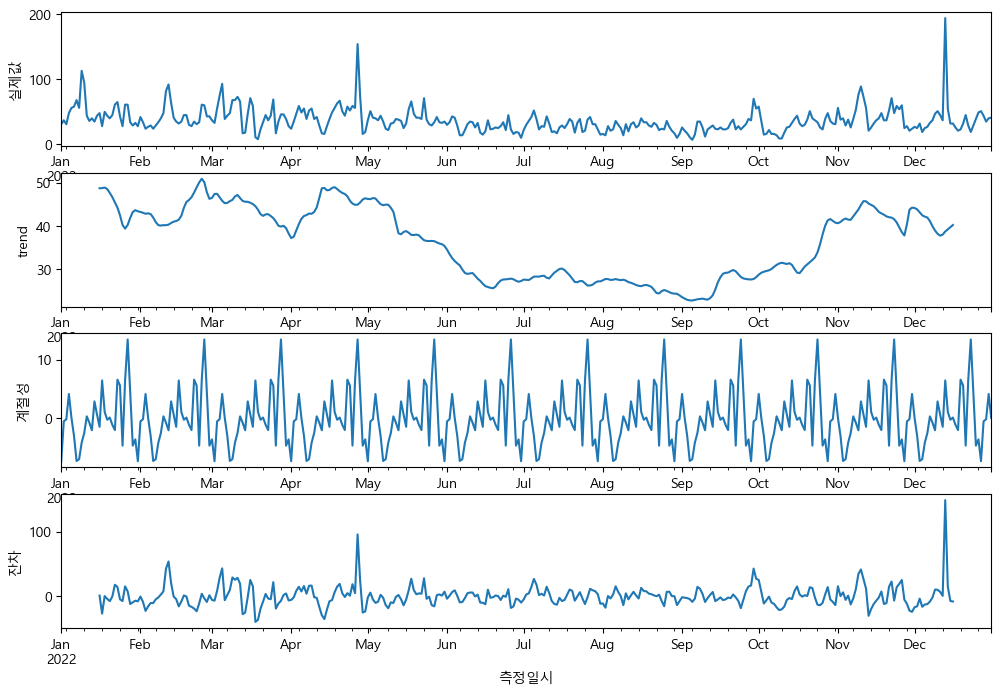

In [45]:
# trend 추세, 계절성, 실제값
result = seasonal_decompose(df_flt3['미세먼지농도'],
                            period=30,         # 30일 단위로 계절성을 분석
                            model='additive')  # 계절성, 추세, 잔차를 덧셈으로 분석

fig, axes = plt.subplots(4, 1, figsize=(12, 8))
result.observed.plot(ax=axes[0])
axes[0].set_ylabel('실제값')  # observed
result.trend.plot(ax=axes[1])
axes[1].set_ylabel('trend')   # trend
result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('계절성')  # seasonal
result.resid.plot(ax=axes[3])
axes[3].set_ylabel('잔차')    # resid
plt.show()

In [48]:
# facebook에서 개발한 시계열 예측 라이브러리 pip install prophet
from prophet import Prophet
df_flt2.columns = ['ds', 'y']  # fit 시 - ds:time으로 읽음. y:종속변수로 읽음
df_flt2.head()

,ds,y
44,2022-01-01,31.0
93,2022-01-02,37.0
143,2022-01-03,31.0
196,2022-01-04,48.0
244,2022-01-05,56.0


In [49]:
p = Prophet()
p.fit(df_flt2)

16:38:40 - cmdstanpy - INFO - Chain [1] start processing
16:38:40 - cmdstanpy - INFO - Chain [1] done processing


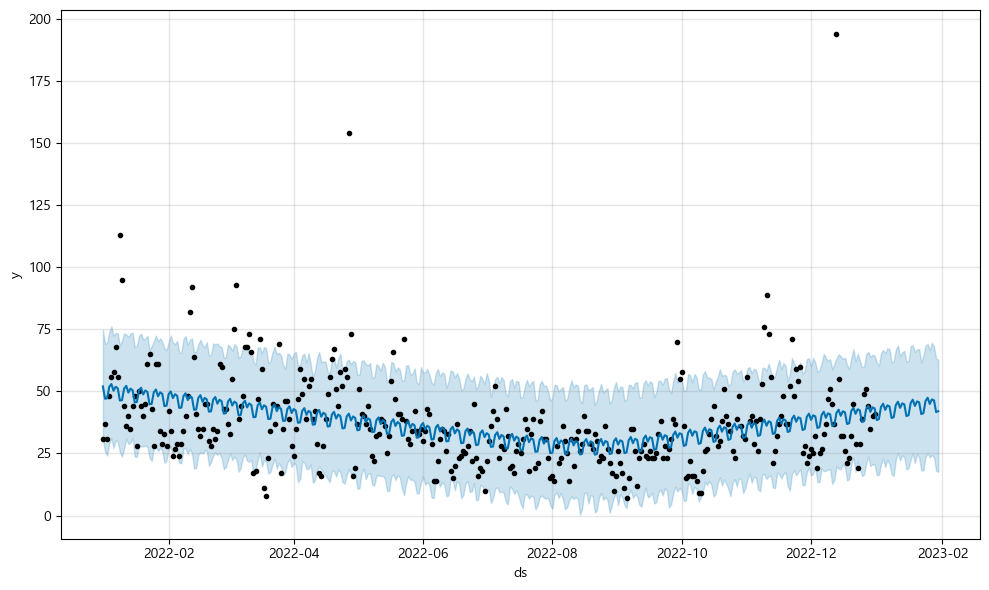

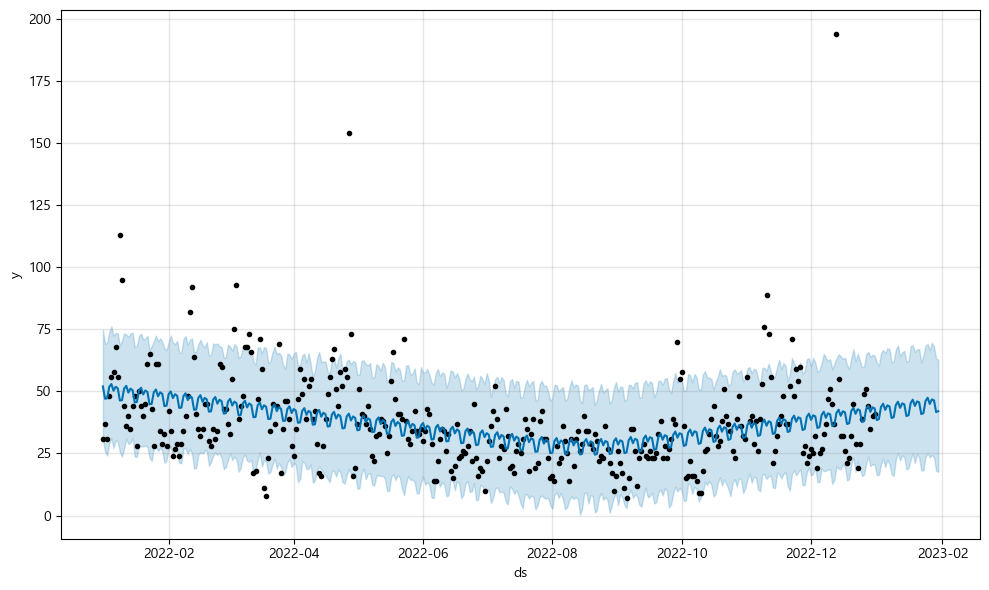

In [51]:
future = p.make_future_dataframe(periods=30)  # 30일 이후의 데이터를 예측
forecast = p.predict(future)
f = p.plot(forecast)

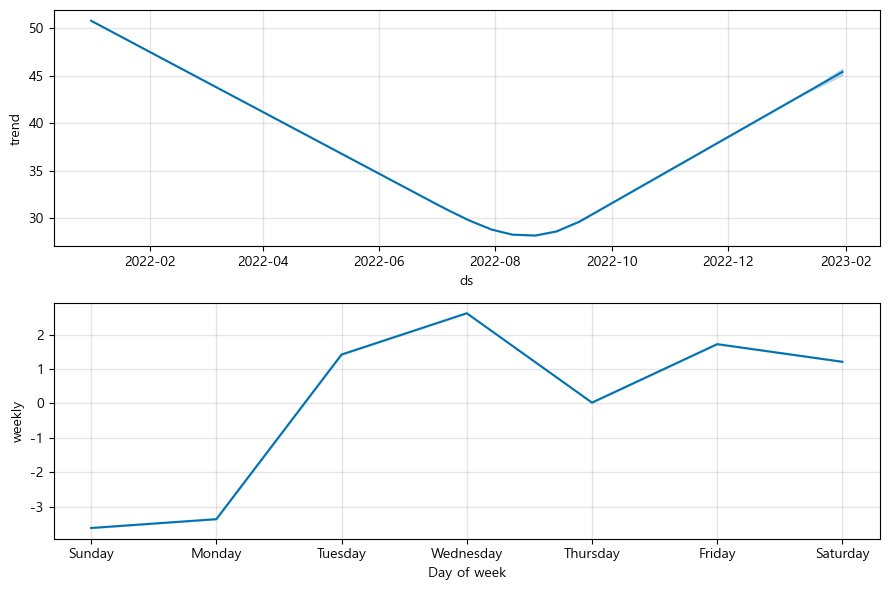

In [52]:
f2 = p.plot_components(forecast)  # 트렌드와 휴일효과 그래프

In [57]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(3)

,ds,yhat,yhat_lower,yhat_upper
392,2023-01-28,46.383990,23.355393,68.034265
393,2023-01-29,41.665305,18.084952,63.255932
394,2023-01-30,42.036962,17.602483,62.735024


In [56]:
forecast.loc[forecast['ds'] == '2023-01-15', ['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
379,2023-01-15,40.062684,18.545365,61.843831
